In [2]:
library(rethinking)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.16.2, packaged: 2017-07-03 09:24:58 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.59)


In [3]:
library(dplyr)
df <- read.csv('2017_2018.csv')


df_hemma <- select(df, 1,2,4)
df_hemma$hemma <- 1
colnames(df_hemma) <- c("date", "team", "goals", "home")

df_borta <- select(df, 1, 3, 6)
df_borta$hemma <- 0
colnames(df_borta) <- c("date", "team", "goals", "home")


df <- rbind(df_hemma, df_borta)
df[, "team"]<- as.factor(df[,"team"])
df[, "date"] <- as.Date(df[, "date"], format = "%Y-%m-%d")
str(df)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



'data.frame':	224 obs. of  4 variables:
 $ date : Date, format: "2017-11-05" "2017-11-04" ...
 $ team : Factor w/ 14 levels "Brynäs","Djurgården",..: 7 14 1 3 13 5 12 2 8 10 ...
 $ goals: int  5 3 5 2 4 5 3 3 3 1 ...
 $ home : num  1 1 1 1 1 1 1 1 1 1 ...


In [4]:
mean_goals <- df %>% 
    group_by(team, home) %>% 
    summarize(mean_goals = mean(goals), var_goals = var(goals))
mean_goals

team,home,mean_goals,var_goals
Brynäs,0,1.875000,1.267857
Brynäs,1,2.250000,2.785714
Djurgården,0,2.250000,2.785714
Djurgården,1,3.125000,2.125000
Färjestad,0,3.222222,2.194444
Färjestad,1,3.375000,3.410714
Frölunda,0,3.000000,1.333333
Frölunda,1,2.444444,2.027778
HV71,0,2.222222,1.194444
HV71,1,2.875000,2.982143


In [5]:
teams_no <- sort(as.numeric(unique(df$team)))
teams_no

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14

In [6]:
teams <- sort(unique(df$team))
teams

[1] Brynäs     Djurgården Färjestad  Frölunda   HV71       Karlskrona
 [7] Linköping  Luleå      Malmö      Mora       Örebro     Rögle     
[13] Skellefteå Växjö     
14 Levels: Brynäs Djurgården Färjestad Frölunda HV71 Karlskrona ... Växjö

In [7]:
m3 <- map2stan(
    alist(
        goals ~ dpois(lambda),
        log(lambda) <- alpha[team] + beta*home,
        alpha[team] ~ dnorm(mu_a,sigma_a),
        beta ~ dnorm(mu_b,sigma_b),
        mu_a ~ dnorm(1,1),
        mu_b ~ dnorm(0,1),
        sigma_a ~ dcauchy(0,1),
        sigma_b ~ dcauchy(0,1)
    ),
    data = df,
    iter = 5000,
    warmup = 2000,
    chains = 2
)

In file included from /opt/conda/lib/R/library/BH/include/boost/config.hpp:39:0,
                 from /opt/conda/lib/R/library/BH/include/boost/math/tools/config.hpp:13,
                 from /opt/conda/lib/R/library/StanHeaders/include/stan/math/rev/core/var.hpp:7,
                 from /opt/conda/lib/R/library/StanHeaders/include/stan/math/rev/core/gevv_vvv_vari.hpp:5,
                 from /opt/conda/lib/R/library/StanHeaders/include/stan/math/rev/core.hpp:12,
                 from /opt/conda/lib/R/library/StanHeaders/include/stan/math/rev/mat.hpp:4,
                 from /opt/conda/lib/R/library/StanHeaders/include/stan/math.hpp:4,
                 from /opt/conda/lib/R/library/StanHeaders/include/src/stan/model/model_header.hpp:4,
                 from file6fa7fdefc5.cpp:8:
/opt/conda/lib/R/library/BH/include/boost/config/compiler/gcc.hpp:186:0: warning: "BOOST_NO_CXX11_RVALUE_REFERENCES" redefined
 #  define BOOST_NO_CXX11_RVALUE_REFERENCES
 ^
<command-line>:0:0: note: this is t

Warning message:
“There were 213 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“There were 2 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


SAMPLING FOR MODEL 'goals ~ dpois(lambda)' NOW (CHAIN 1).

Gradient evaluation took 0.00028 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.8 seconds.
Adjust your expectations accordingly!


         performed for num_warmup < 20

Iteration: 1 / 1 [100%]  (Sampling)

 Elapsed Time: 1e-06 seconds (Warm-up)
               0.000877 seconds (Sampling)
               0.000878 seconds (Total)



Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Computing WAIC
Constructing posterior predictions


[ 6000 / 6000 ]


Warning message in map2stan(alist(goals ~ dpois(lambda), log(lambda) <- alpha[team] + :
“There were 213 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.”

Waiting to draw page 2 of 2


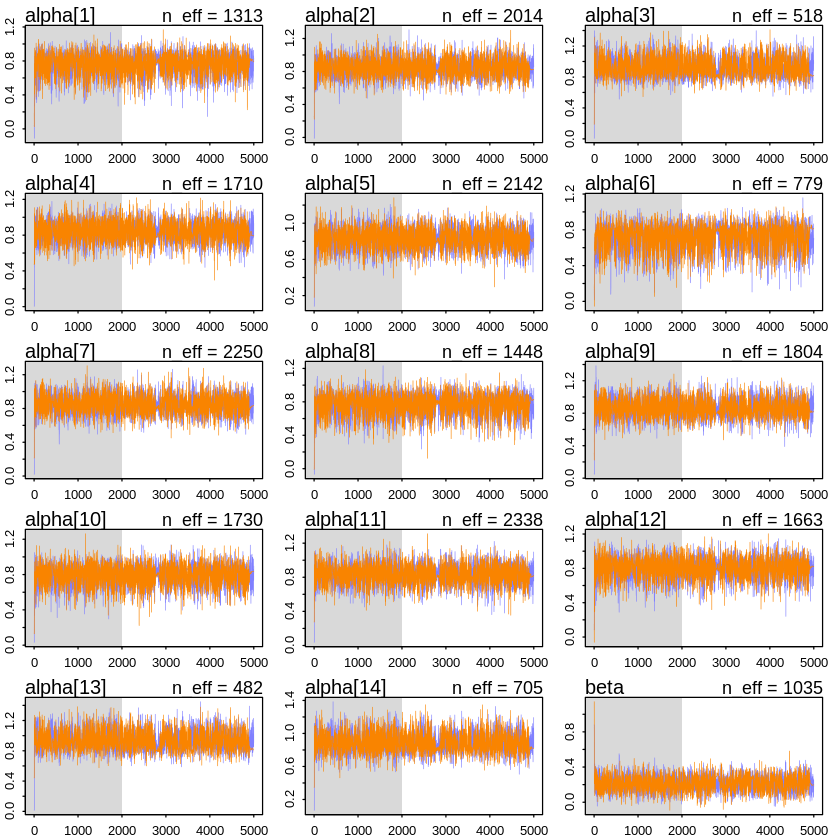

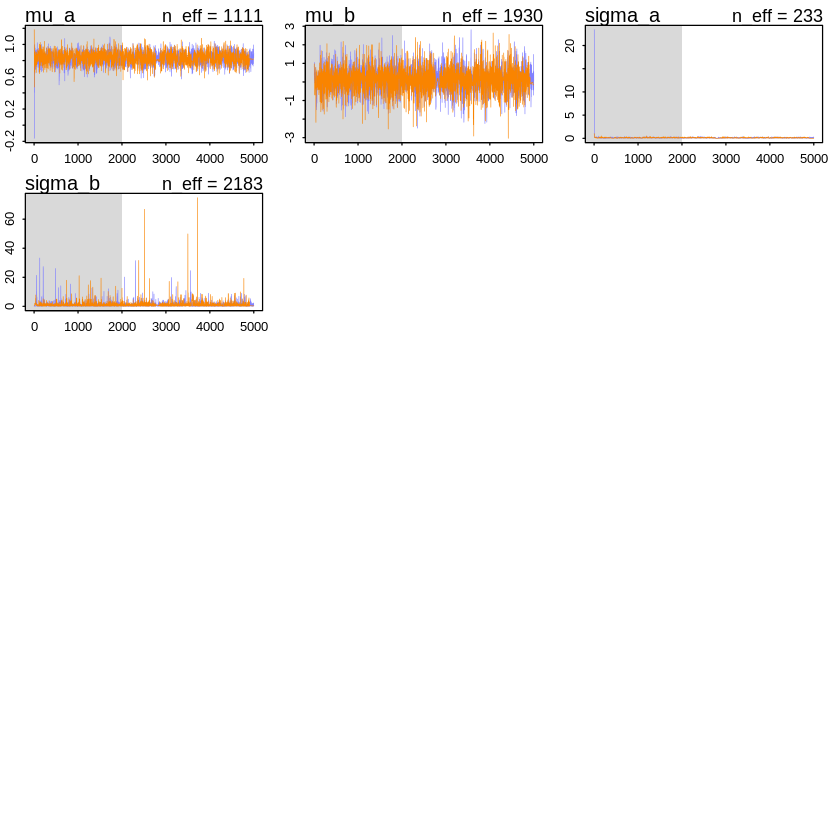

In [8]:
plot(m3)

In [9]:
precis(m3, depth=2)

Warning message in precis(m3, depth = 2):
“There were 213 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.”

          Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
alpha[1]  0.76   0.12       0.57       0.94  1313    1
alpha[2]  0.84   0.10       0.68       1.01  2014    1
alpha[3]  0.92   0.12       0.74       1.10   518    1
alpha[4]  0.84   0.10       0.68       1.01  1710    1
alpha[5]  0.83   0.10       0.65       0.99  2142    1
alpha[6]  0.72   0.13       0.51       0.92   779    1
alpha[7]  0.84   0.10       0.68       1.01  2250    1
alpha[8]  0.77   0.12       0.58       0.94  1448    1
alpha[9]  0.86   0.11       0.69       1.03  1804    1
alpha[10] 0.79   0.11       0.62       0.96  1730    1
alpha[11] 0.83   0.11       0.66       1.00  2338    1
alpha[12] 0.80   0.11       0.62       0.96  1663    1
alpha[13] 0.93   0.12       0.75       1.13   482    1
alpha[14] 0.89   0.11       0.71       1.06   705    1
beta      0.21   0.08       0.08       0.35  1035    1
mu_a      0.83   0.07       0.73       0.95  1111    1
mu_b      0.14   0.60      -0.92       1.00  1930    1
sigma_a   

In [10]:
team_coef <- exp(coef(m3))[1:14]
home_coef <- exp(coef(m3))[[15]]
team_coef <- data.frame(team_coef)
teams <- data.frame(teams)
team_coef <- cbind(team_coef, teams)
rownames(team_coef) <- team_coef$teams
#team_coef <- team_coef$team_coef
team_coef

,team_coef,teams
Brynäs,2.143409,Brynäs
Djurgården,2.324863,Djurgården
Färjestad,2.516263,Färjestad
Frölunda,2.312909,Frölunda
HV71,2.286941,HV71
Karlskrona,2.053805,Karlskrona
Linköping,2.327074,Linköping
Luleå,2.155669,Luleå
Malmö,2.362512,Malmö
Mora,2.205278,Mora


In [11]:
df <- filter(team_coef, teams == 'Brynäs')[[1]]
df

[1] 2.143409

In [17]:
calculate_odds <- function(coef, home_coef, team_home, team_away) {
    home_alpha <- filter(team_coef, teams == team_home)[[1]];
    away_alpha <- filter(team_coef, teams == team_away)[[1]]
    print (home_alpha)
    print (away_alpha)
    
    # predict the last game of the season
    home <- rpois(n = 5000, lambda = home_alpha * home_coef)
    away <- rpois(n = 5000, lambda = away_alpha)
    res <- home - away
    tie <- sum(res == 0)
    loss <- sum(res < 0)
    win <- sum(res > 0)
    final_res <- c(win, tie, loss)
    final_prob <- final_res / sum(final_res)
    final_odds <- 1/ final_prob
    print (final_odds)
}

In [18]:
calculate_odds(team_coef, home_coef, 'Brynäs', 'HV71')

[1] 2.143409
[1] 2.286941
[1] 2.144082 5.370569 2.878526


In [19]:
calculate_odds(team_coef, home_coef, 'Frölunda', 'Djurgården')

[1] 2.312909
[1] 2.324863
[1] 2.018571 5.494505 3.099814


In [20]:
calculate_odds(team_coef, home_coef, 'Luleå', 'Färjestad')

[1] 2.155669
[1] 2.516263
[1] 2.275831 5.470460 2.646903


In [21]:
calculate_odds(team_coef, home_coef, 'Malmö', 'Linköping')

[1] 2.362512
[1] 2.327074
[1] 1.947040 5.813953 3.180662
